In [235]:
import numpy as np
import time
import tensorflow as tf
import matplotlib.pyplot as plt 

In [53]:
from Bio import SeqIO

fasta_sequences = SeqIO.parse(open('deeploc_data.fasta'),'fasta')
ids = []
description = []
seqs = []
for fasta in fasta_sequences:
    idx, name, sequence = fasta.id, fasta.description, str(fasta.seq)
    ids.append(idx)
    description.append(name)
    seqs.append(sequence)
print(len(ids))
print(len(seqs))

14004
14004


In [54]:
seqs[0]

'MGLPVSWAPPALWVLGCCALLLSLWALCTACRRPEDAVAPRKRARRQRARLQGSATAAEASLLRRTHLCSLSKSDTRLHELHRGPRSSRALRPASMDLLRPHWLEVSRDITGPQAAPSAFPHQELPRALPAAAATAGCAGLEATYSNVGLAALPGVSLAASPVVAEYARVQKRKGTHRSPQEPQQGKTEVTPAAQVDVLYSRVCKPKRRDPGPTTDPLDPKGQGAILALAGDLAYQTLPLRALDVDSGPLENVYESIRELGDPAGRSSTCGAGTPPASSCPSLGRGWRPLPASLP'

In [55]:
ids[0]

'Q9H400'

In [56]:
description[0]

'Q9H400 Cell.membrane-M test'

In [231]:
locations = [ d.split()[1].split('-')[0] for d in description]
label_enc = dict((l,i) for i, l in enumerate(set(locations)))
label_dec = dict((i,l) for i, l in enumerate(set(locations)))

labels = [label_enc[l] for l in locations]


In [232]:
locations[2000:2010]

['Cytoplasm',
 'Cytoplasm',
 'Cytoplasm',
 'Cytoplasm',
 'Cytoplasm',
 'Cytoplasm',
 'Cytoplasm',
 'Cytoplasm',
 'Cytoplasm',
 'Cytoplasm']

In [233]:
labels[2000:2010]

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]

In [234]:
from sklearn.preprocessing import LabelBinarizer
labels = LabelBinarizer().fit_transform(labels)
labels.shape

(14004, 10)

In [278]:
from collections import Counter
c = Counter(locations)

for k, v in c.items():
  print(k, '\t',v)

Cell.membrane 	 1340
Cytoplasm 	 2688
Endoplasmic.reticulum 	 862
Golgi.apparatus 	 356
Lysosome/Vacuole 	 321
Mitochondrion 	 1510
Nucleus 	 4043
Peroxisome 	 154
Plastid 	 757
Extracellular 	 1973


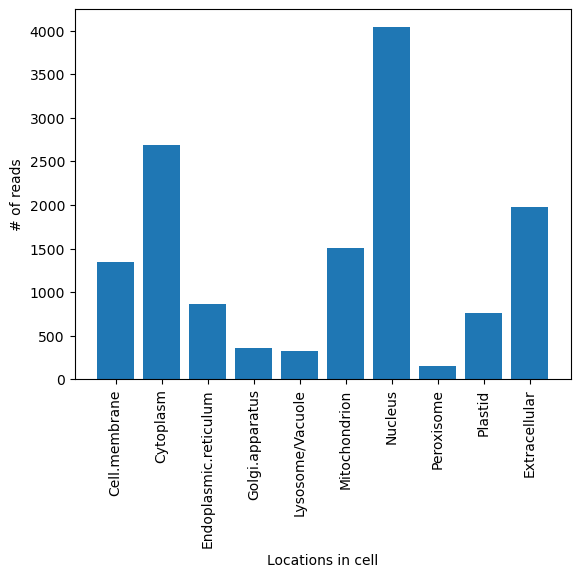

In [328]:
plt.bar(range(len(c)), c.values(), align='center')
plt.xticks(range(len(c)), list(c.keys()), rotation = 90)
plt.xlabel("Locations in cell")
plt.ylabel("# of reads")
plt.show()

In [310]:
lengths = []
for seq in seqs:
    l = len(seq)
    lengths.append(len(seq))

[13379   558    48    14     3     1     0     0     0     1]
[   40.  1346.  2652.  3958.  5264.  6570.  7876.  9182. 10488. 11794.
 13100.]


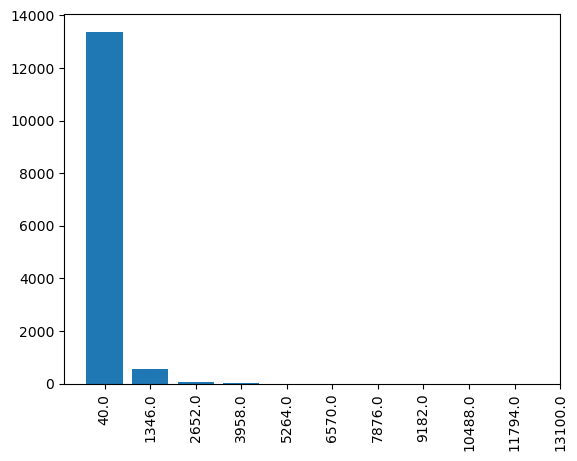

In [327]:
counts, bins = np.histogram(lengths, bins=10)
print(counts)
print(bins)

plt.bar(range(len(counts)), counts, align='center')
plt.xticks(range(len(bins)), list(bins), rotation = 90)
plt.show()


In [316]:
long_seq = [locations[i] for i,l in enumerate(lengths) if l>1200]
ls_count = Counter(long_seq)

print("Location", '\t', '#of_long_seq',  '%of_long_seq')
print("=================================================")
for k, v in ls_count.items():
  print(k, '\t',v,  v*100/c[k])


Location 	 #of_long_seq %of_long_seq
Cell.membrane 	 98 7.313432835820896
Cytoplasm 	 259 9.635416666666666
Endoplasmic.reticulum 	 32 3.7122969837587005
Golgi.apparatus 	 14 3.932584269662921
Lysosome/Vacuole 	 13 4.049844236760125
Mitochondrion 	 9 0.5960264900662252
Nucleus 	 376 9.300024734108336
Peroxisome 	 3 1.948051948051948
Plastid 	 9 1.1889035667107002
Extracellular 	 43 2.1794221996958947


In [303]:
aminos = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'X', 'U', 'B','Z']
    
def seq_to_onehot(seq, aminos, maxLen = 1200):
    import numpy as np
    char_to_int = dict((c, i) for i, c in enumerate(aminos))
    int_to_char = dict((i, c) for i, c in enumerate(aminos))

    seq_to_int = [ char_to_int[c] for c in seq] 

    n_row = maxLen
    n_col = len(aminos)

    onehot = np.zeros((n_row, n_col), dtype=int)

    for i, x in enumerate(seq_to_int):
        if i == 1200:
            break
        onehot[i][x] = 1
    
    return onehot

In [304]:

seq_set = []
start = time.time()
for seq in seqs:
    onehot = seq_to_onehot(seq,aminos)
    seq_set.append(onehot)
end = time.time()
print(end-start)


3.2036831378936768


In [317]:
seq_set = np.array(seq_set)
seq_set.shape


(14004, 1200, 24)

In [318]:
test_idx = []
train_idx = []
for i,d in enumerate(description):
    tmp = d.split()
    if len(tmp)==3 and tmp[-1]=='test':
        test_idx.append(i)
    else:
        train_idx.append(i)

In [319]:
print(len(test_idx))
print(len(train_idx))

2773
11231


In [320]:
train_seq = seq_set[train_idx]
test_seq = seq_set[test_idx]

In [321]:
train_labels = np.array([labels[i] for i in train_idx])
test_labels = np.array([labels[i] for i in test_idx])

In [322]:
print(train_seq.shape)
print(test_seq.shape)
print(train_labels.shape)
print(test_labels.shape)

(11231, 1200, 24)
(2773, 1200, 24)
(11231, 10)
(2773, 10)
